# 🧠 Simple CNN Demo: Cat vs Dog Classification
This notebook demonstrates a simple Convolutional Neural Network using the CIFAR-10 dataset to classify cats and dogs.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

✅ Imports

tensorflow: Deep learning library used to build and train neural networks.

layers, models: For defining CNN architecture.

cifar10: Built-in image dataset (10 classes including cat and dog).

matplotlib.pyplot: For visualizing images.

numpy: For numerical operations (filtering, reshaping, etc.).

## 🔹 Load and Filter CIFAR-10 Dataset
We only use labels 3 (cat) and 5 (dog).

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


 Load CIFAR-10 dataset

Splits into train and test data.

Each image is 32x32 pixels with 3 color channels.

y_train and y_test contain labels from 0 to 9.

In [11]:
train_filter = np.where((y_train == 3) | (y_train == 5))[0]
test_filter = np.where((y_test == 3) | (y_test == 5))[0]

🔍 Filter for only cats (3) and dogs (5)

np.where finds indices where label is 3 or 5.

We will only use those images.



In [16]:
x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

🧹 Apply filters to get only cat and dog images

Keeps only selected classes (3 and 5).

In [19]:
y_train = (y_train == 5).astype(int)
y_test = (y_test == 5).astype(int)

🏷️ Convert labels:

Cat → 0, Dog → 1 (binary classification).

== 5 returns True for dogs, False for cats.

.astype(int) converts True/False to 1/0.

In [22]:
x_train, x_test = x_train / 255.0, x_test / 255.0

📉 Normalize pixel values

Pixel values range from 0 to 255.

Divide by 255 to bring them to range [0, 1] for faster training.

## 🔹 Define CNN Model

In [26]:
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\Asus\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🧠 Define CNN model

Sequential: Linear stack of layers.

Conv2D(16, (3, 3)): 16 filters, 3x3 kernel, detects features.

MaxPooling2D: Reduces spatial size (downsampling).

More Conv2D layers → deeper features.

Flatten(): Converts 2D features into 1D vector.

Dense(64): Fully connected layer with 64 neurons.

Dense(1, sigmoid): Final output neuron (0 or 1) for binary classification.

In [29]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

🧪 Compile model

adam: Optimizer (adjusts weights).

binary_crossentropy: Loss for binary classification.

accuracy: Monitor this metric during training.

## 🔹 Train the Model

In [33]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5636 - loss: 0.6757 - val_accuracy: 0.6660 - val_loss: 0.6202
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6694 - loss: 0.6076 - val_accuracy: 0.6825 - val_loss: 0.5834
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7094 - loss: 0.5591 - val_accuracy: 0.7105 - val_loss: 0.5640
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7197 - loss: 0.5451 - val_accuracy: 0.7135 - val_loss: 0.5479
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7421 - loss: 0.5154 - val_accuracy: 0.7080 - val_loss: 0.5589


📈 Train the model

epochs=5: Train the model 5 times on all training data.

validation_data: Checks accuracy on test data after each epoch.

Stores progress in history.



## 🔹 Evaluate the Model

In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.2f}')

63/63 - 0s - 2ms/step - accuracy: 0.7080 - loss: 0.5589

Test accuracy: 0.71


📊 Evaluate performance

Measures accuracy on unseen test data.

## 🔹 Make Predictions and Visualize

In [41]:
predictions = (model.predict(x_test) > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


🧠 Make predictions

Model outputs probabilities (0.0–1.0).

Threshold: If > 0.5 → Dog (1), else Cat (0).

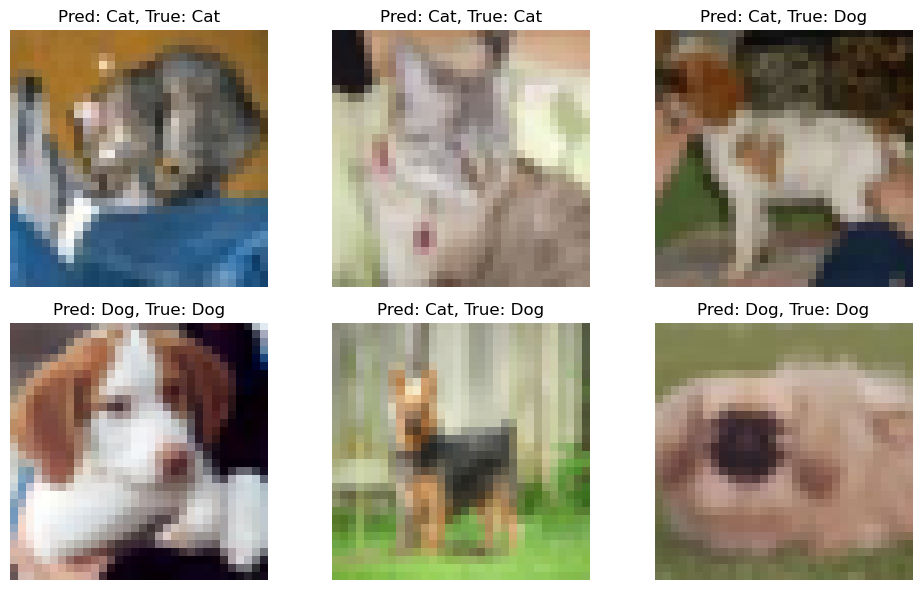

In [44]:
class_names = ['Cat', 'Dog']
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[predictions[i][0]]}, True: {class_names[y_test[i][0]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

🖼️ Plot some test images with predicted and true labels

Shows 6 test images.

Displays model’s prediction vs ground truth for each.